# Energy Efficiency

What can you tell me about the data?

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import pandas as pd
df = pd.read_csv('../data/energy/energy.csv')
df.shape

(768, 10)

In [7]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


X2, X3, X4 might be candidates for normalization;   
X5, X6, X8 likely to be discrete values;  
Y1, Y2 within the same range

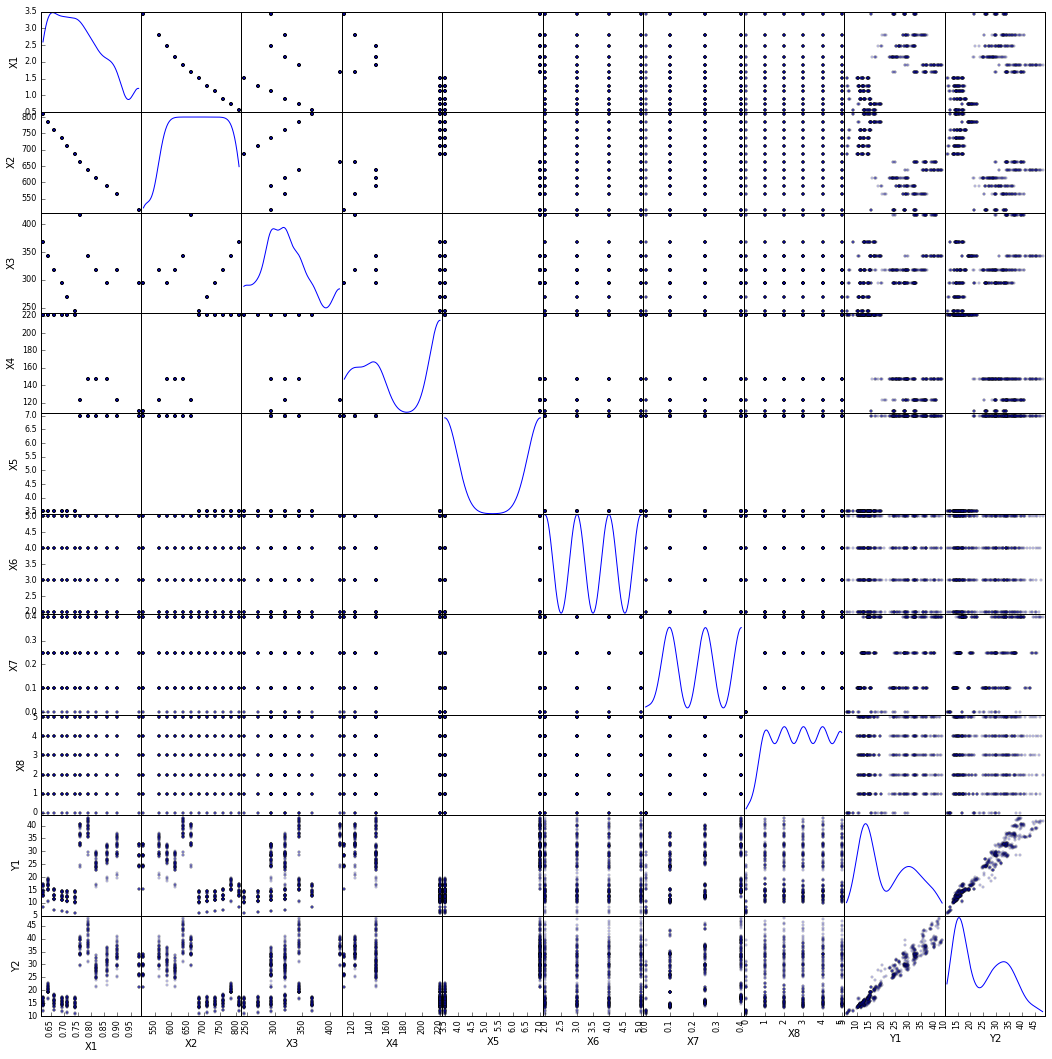

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

observations:
maybe X5 is binary?
X2 and X1 seem to have strong correlation

## Data Visualization with Pandas

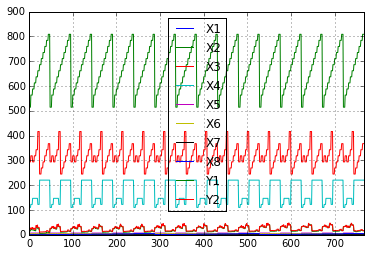

In [9]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

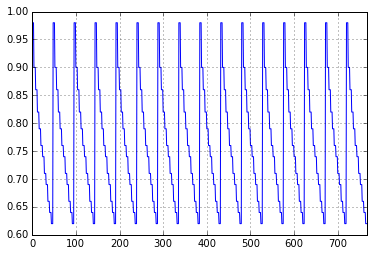

In [10]:
#Individual Elements in the DF
df['X1'].plot()
plt.show()

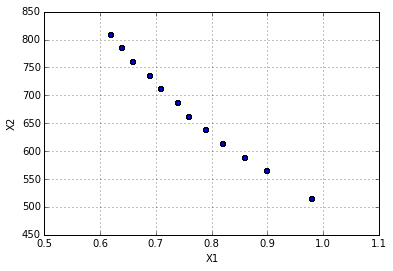

In [11]:
# Use the 'kind' keyword for different variations
# Other kinds: 'bar', 'hist', 'box', 'kde',
# 'area', 'scatter', 'hexbin', 'pie'
df.plot(x='X1', y='X2', kind='scatter')
plt.show()

In [12]:
plt.savefig('myfig.png')

In [13]:
# Complex function in pandas.plotting that take DataFrame or Series as arg
# Scatter Matrix, Andrews Curves, Parallel Coordinates, Lag Plot,
#      Autocorrelation Plot, Bootstrap Plot, RadViz

## Loading the Prepared Data

In [24]:
from utils import *
from sklearn.cross_validation import train_test_split as tts
dataset = load_energy()

In [20]:
print(dataset)

{'_target_set': {'Y1': array([ 15.55,  15.55,  15.55,  15.55,  20.84,  21.46,  20.71,  19.68,
        19.5 ,  19.95,  19.34,  18.31,  17.05,  17.41,  16.95,  15.98,
        28.52,  29.9 ,  29.63,  28.75,  24.77,  23.93,  24.77,  23.93,
         6.07,   6.05,   6.01,   6.04,   6.37,   6.4 ,   6.37,   6.4 ,
         6.85,   6.79,   6.77,   6.81,   7.18,   7.1 ,   7.1 ,   7.1 ,
        10.85,  10.54,  10.77,  10.56,   8.6 ,   8.49,   8.45,   8.5 ,
        24.58,  24.63,  24.63,  24.59,  29.03,  29.87,  29.14,  28.09,
        26.28,  26.91,  26.37,  25.27,  23.53,  24.03,  23.54,  22.58,
        35.56,  37.12,  36.9 ,  35.94,  32.96,  32.12,  32.94,  32.21,
        10.36,  10.43,  10.36,  10.39,  10.71,  10.8 ,  10.7 ,  10.75,
        11.11,  11.13,  11.09,  11.16,  11.68,  11.69,  11.7 ,  11.69,
        15.41,  15.2 ,  15.42,  15.21,  12.96,  12.97,  12.93,  13.02,
        24.29,  24.31,  24.13,  24.25,  28.88,  29.68,  28.83,  27.9 ,
        26.48,  27.02,  26.33,  25.36,  23.75,  24.23,

In [22]:
type(dataset)

sklearn.datasets.base.Bunch

What is a bunch??  
We'll talk about that soon.  
In the meantime ask for help...

In [23]:
help(dataset)

Help on Bunch in module sklearn.datasets.base object:

class Bunch(__builtin__.dict)
 |  Container object for datasets: dictionary-like object that
 |  exposes its keys as attributes.
 |  
 |  Method resolution order:
 |      Bunch
 |      __builtin__.dict
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from __builtin__.dict:
 |  
 |  __cmp__(...)
 |      x.__cmp__(y) <==> cmp(x,y)
 |  
 |  __contains__(...)
 |      D.__contains__(k) -> True if D has a key k, else False
 |  
 |  __delitem__(...)
 |      x.__delitem__(y) <==> del x[y]
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> 

In [25]:
dataset.data.shape

(768, 8)

In [15]:
dataset.target('Y1').shape

(768,)

In [26]:
#other ways to explore 'dataset'
print(dataset.DESCR)

# energy Data Set

Downloaded from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Energy+efficiency) on March 23, 2015

- Data Set: Multivariate
- Attribute: Integer, Real
- Tasks: Regression, Classification
- Instances: 768
- Attributes: 8

## Source:

The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).


## Data Set Information:

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be us

In [27]:
#more ways to exlore 'dataset'
dir(dataset)

['DESCR',
 '__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_target_set',
 'clear',
 'copy',
 'data',
 'feature_names',
 'filenames',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'target',
 'target_names',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [28]:
dir(dataset)

['DESCR',
 '__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_target_set',
 'clear',
 'copy',
 'data',
 'feature_names',
 'filenames',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'target',
 'target_names',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [32]:
splits = tts(dataset.data, dataset.target('Y1'), test_size=0.2)

In [31]:
# what is splits? 
print(splits)

[array([[  7.10000000e-01,   7.10500000e+02,   2.69500000e+02, ...,
          4.00000000e+00,   2.50000000e-01,   5.00000000e+00],
       [  7.90000000e-01,   6.37000000e+02,   3.43000000e+02, ...,
          5.00000000e+00,   4.00000000e-01,   2.00000000e+00],
       [  8.20000000e-01,   6.12500000e+02,   3.18500000e+02, ...,
          5.00000000e+00,   1.00000000e-01,   4.00000000e+00],
       ..., 
       [  6.40000000e-01,   7.84000000e+02,   3.43000000e+02, ...,
          5.00000000e+00,   1.00000000e-01,   3.00000000e+00],
       [  7.10000000e-01,   7.10500000e+02,   2.69500000e+02, ...,
          5.00000000e+00,   1.00000000e-01,   2.00000000e+00],
       [  7.10000000e-01,   7.10500000e+02,   2.69500000e+02, ...,
          2.00000000e+00,   2.50000000e-01,   3.00000000e+00]]), array([[  6.90000000e-01,   7.35000000e+02,   2.94000000e+02, ...,
          4.00000000e+00,   1.00000000e-01,   2.00000000e+00],
       [  7.90000000e-01,   6.37000000e+02,   3.43000000e+02, ...,
       

In [33]:
X_train, X_test, y_train, y_test = splits
X_train.shape

(614, 8)

In [34]:
y_train.shape

(614,)

## Simple Regression with Ordinary Least Squares (OLS)

In [36]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [37]:
print regr.coef_

[ -6.64029790e+01  -2.59125300e+11   2.59125300e+11   5.18250600e+11
   4.23074467e+00  -6.32883460e-02   1.99031163e+01   1.75659106e-01]


In [38]:
print regr.intercept_

86.3109079805


In [39]:
print mean_squared_error(y_test, regr.predict(X_test))

7.27837481184


In [40]:
regr.score(X_test,y_test)
# same as doing r2_score(y_est, regr.predict(X_test))

0.92360948663878939

## Ridge Regression

In [41]:
clf = linear_model.Ridge(alpha=0.5)
clf.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [42]:
print mean_squared_error(y_test, clf.predict(X_test))

7.67171720027


In [43]:
clf.score(X_test, y_test)

0.91948114373870293

so we picked a bad alpha - let's pick a better one...

## Choosing Alpha

In [44]:
import numpy as np

# try 200 different alphas between -10 and -2
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

clf = linear_model.RidgeCV(alphas=alphas)
clf.fit(X_train, y_train)

#which alpha did it pick?
print clf.alpha_

0.000988495904663


In [45]:
clf.score(X_test, y_test)

0.92325895076025666

In [54]:
# plot our alphas
linear_model.Ridge(fit_intercept=False)
errors = []

In [55]:
for alpha in alphas:
    splits = tts(dataset.data, dataset.target('Y1'), test_size=0.2)
    X_train, X_test, y_train, y_test = splits
    clf.set_params(alpha=alpha)
    clf.fit(X_train, y_train)
    error = mean_squared_error(y_test, clf.predict(X_test))
    errors.append(error)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:490: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


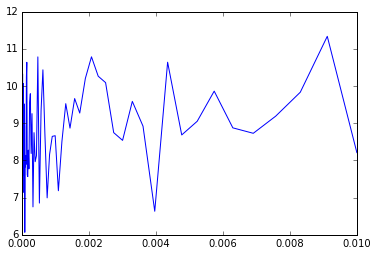

In [56]:
axe = plt.gca()
axe.plot(alphas, errors)
plt.show()

## Lasso Regression

In [51]:
clf = linear_model.Lasso(alpha=0.5)
clf.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute='auto', tol=0.0001,
   warm_start=False)

In [52]:
print mean_squared_error(y_test, clf.predict(X_test))

21.4254306394


In [53]:
clf.score(X_test, y_test)

0.7978589472104094

## Pipelined Model

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [58]:
model = make_pipeline(PolynomialFeatures(2), linear_model. Ridge())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001))])

In [59]:
mean_squared_error(y_test, model.predict(X_test))

4.3190411801923325

In [60]:
model.score(X_test, y_test)

0.95415019535758072

now it's time to worry about overfit

##Visualization with MatPlotLib

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
x = np.linspace(-15,15,100) 
# 100 evenly spaced nums between -15 and 15

y = np.sin(x)/x 
# compute values of sin(x) / x

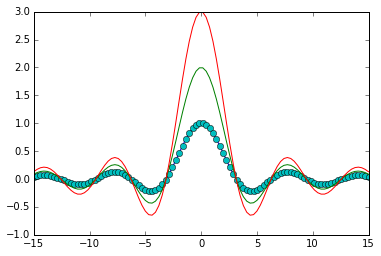

In [66]:
# compose plot
plt.plot(x,y, label="f(x)") # sin(x)/x
plt.plot(x,y, 'co', label="cyan dot f(x)")
plt.plot(x,2*y,x,3*y, label="scaled f(x)")

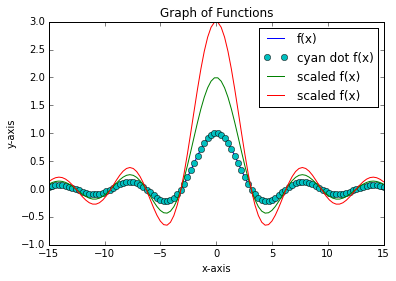

In [69]:
# add plot details! Or else Ben will be mad
plt.plot(x,y, label="f(x)")
plt.plot(x,y, 'co', label="cyan dot f(x)")
plt.plot(x,2*y,x,3*y, label="scaled f(x)")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Graph of Functions")
plt.legend()
plt.show()

more at http://matplotlib.org/users/pyplot_tutorial.html